In [12]:
import matplotlib.pyplot as plt


In [40]:
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions
        self.optimal_coefficients=None

    def generate_bs_stock_paths(self, S0, r, sigma):
        paths = np.zeros((self.N, self.m+1, len(S0)))
        dt = self.T / self.m

        for i in range(self.N):
            for j in range(len(S0)):
                paths[i, 0, j] = S0[j]  # Set initial stock prices
                for k in range(self.m):
                    z = np.random.randn(len(S0))
                    paths[i, k+1, j] = paths[i, k, j] * np.exp((r[j] - 0.5 * sigma[j]**2) * dt +
                                                              sigma[j] * np.sqrt(dt) * z[j])

        return paths

    def compute_option_price(self, S0, r, sigma):
        paths = self.generate_bs_stock_paths(S0, r, sigma)

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return np.dot(X, self.optimal_coefficients)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.optimal_coefficients = np.linalg.inv(X.T @ X) @ X.T @ values

def generate_bs_multidimensional_stock_paths(S0, r, sigma, T, N, m):
    paths = np.zeros((N, m+1, len(S0)))
    dt = T / m

    for i in range(N):
        for j in range(len(S0)):
            paths[i, 0, j] = S0[j]  # Set initial stock prices
            for k in range(m):
                z = np.random.randn(len(S0))
                paths[i, k+1, j] = paths[i, k, j] * np.exp((r[j] - 0.5 * sigma[j]**2) * dt +
                                                          sigma[j] * np.sqrt(dt) * z[j])

    return paths

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
r = [0.05, 0.06, 0.04, 0.03, 0.05]  # Risk-free interest rates for the assets
sigma = [0.2, 0.25, 0.3, 0.35, 0.4]  # Volatility for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]
"""
option_pricer_laguerre = MaxCallOptionPricer(N, m, T, laguerre_basis_functions)
option_pricer_chebyshev = MaxCallOptionPricer(N, m, T, chebyshev_basis_functions)

option_price_laguerre = option_pricer_laguerre.compute_option_price(S0, r, sigma)
option_price_chebyshev = option_pricer_chebyshev.compute_option_price(S0, r, sigma)"""

#print("Max Call Option Price (Laguerre):", option_price_laguerre)
#print("Max Call Option Price (Chebyshev):", option_price_chebyshev)


'\noption_pricer_laguerre = MaxCallOptionPricer(N, m, T, laguerre_basis_functions)\noption_pricer_chebyshev = MaxCallOptionPricer(N, m, T, chebyshev_basis_functions)\n\noption_price_laguerre = option_pricer_laguerre.compute_option_price(S0, r, sigma)\noption_price_chebyshev = option_pricer_chebyshev.compute_option_price(S0, r, sigma)'

In [5]:
# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
r = [0.05, 0.06, 0.04, 0.03, 0.05]  # Risk-free interest rates for the assets
sigma = [0.2, 0.25, 0.3, 0.35, 0.4]  # Volatility for the assets

Mo=MaxCallOptionPricer(N, m, T, laguerre_basis_functions)



In [10]:
Y=Mo.generate_bs_stock_paths(S0,r,sigma)


In [41]:
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

option_pricer_laguerre = MaxCallOptionPricer(N, m, T, laguerre_basis_functions)

In [42]:
option_pricer_laguerre.compute_option_price(S0, r, sigma)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

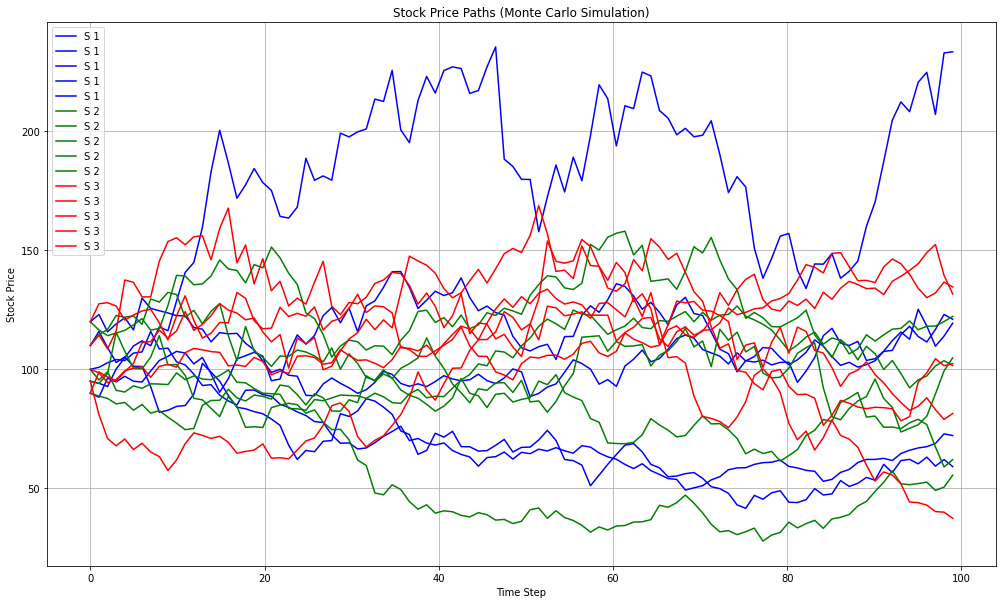

In [32]:
# Generate Monte Carlo paths
paths_mc = Y
# Generate Monte Carlo paths
#paths_mc = option_pricer_linear.generate_mc_stock_paths(S0, mu, vol)

# Plot the paths


# Define colors for paths
colors = ['b', 'g', 'r', 'c', 'm']

# Plot the paths
plt.figure(figsize=(17, 10))
time_steps = np.linspace(0, m-1, m+1)  # Adjust the x-axis values
for i in range(3):
    plt.plot(time_steps, paths_mc[i], color=colors[i], label=f"S {i+1}")

plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.title('Stock Price Paths (Monte Carlo Simulation)')
plt.legend()
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (10000, 101, 5)

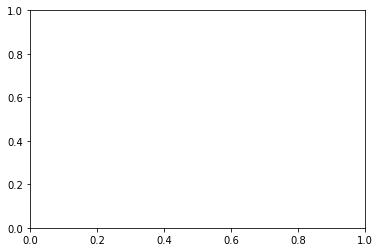

In [13]:
t = np.linspace(0,T,m)
plt.plot(t,Y)
plt.Show()

In [ ]:
Certainly! Here's an updated version of the code that includes the generation of stock paths using the quasi-Monte Carlo method and incorporates it into the `MaxCallOptionPricer` class:

```python
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm
from scipy.stats import qmc

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions

    def generate_bs_stock_paths(self, S0, r, sigma):
        paths = np.zeros((self.N, self.m+1, len(S0)))
        dt = self.T / self.m

        for i in range(self.N):
            for j in range(len(S0)):
                paths[i, 0, j] = S0[j]  # Set initial stock prices
                for k in range(self.m):
                    z = np.random.randn(len(S0))
                    paths[i, k+1, j] = paths[i, k, j] * np.exp((r[j] - 0.5 * sigma[j]**2) * dt +
                                                              sigma[j] * np.sqrt(dt) * z[j])

        return paths

    def generate_qmc_stock_paths(self, S0, r, sigma):
        paths = np.zeros((self.N, self.m+1, len(S0)))
        dt = self.T / self.m
        sampler = qmc.Sobol(d=len(S0), scramble=True)

        for i in range(self.N):
            sequence = sampler.random(self.m + 1)
            for j in range(len(S0)):
                paths[i, 0, j] = S0[j]  # Set initial stock prices
                for k in range(self.m):
                    z = norm.ppf(sequence[k+1, j])
                    paths[i, k+1, j] = paths[i, k, j] * np.exp((r[j] - 0.5 * sigma[j]**2) * dt +
                                                              sigma[j] * np.sqrt(dt) * z)

        return paths

    def compute_option_price(self, S0, r, sigma, method='bs'):
        if method == 'bs':
            paths = self.generate_bs_stock_paths(S0, r, sigma)
        elif method == 'qmc':
            paths = self.generate_qmc_stock_paths(S0, r, sigma)
        else:
            raise ValueError("Invalid method. Choose 'bs' or 'qmc'.")

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return np.dot(X, self.optimal_coefficients)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.optimal_coefficients = np.linalg.inv(X.T @ X) @ X.T @ values

def generate_bs_multidimensional_stock_paths(S0, r, sigma, T, N, m):
    paths = np.zeros((N, m+1, len(S0)))
    dt = T / m

    for i in range(N):
        for j in range(len(S0)):
            paths[i, 0, j] = S0[j]  # Set initial stock prices
            for k in range(m):
                z = np.random.randn(len(S0))
                paths[i, k+1, j] = paths[i, k, j] * np.exp((r[j] - 0.5 * sigma[j]**2) * dt +
                                                          sigma[j] * np.sqrt(dt) * z[j])

    return paths

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
r = [0.05, 0.06, 0.04, 0.03, 0.05]  # Risk-free interest rates for the assets
sigma = [0.2, 0.25, 0.3, 0.35, 0.4]  # Volatility for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

option_pricer_laguerre = MaxCallOptionPricer(N, m, T, laguerre_basis_functions)
option_pricer_chebyshev = MaxCallOptionPricer(N, m, T, chebyshev_basis_functions)

option_price_laguerre_bs = option_pricer_laguerre.compute_option_price(S0, r, sigma, method='bs')
option_price_chebyshev_bs = option_pricer_chebyshev.compute_option_price(S0, r, sigma, method='bs')
option_price_laguerre_qmc = option_pricer_laguerre.compute_option_price(S0, r, sigma, method='qmc')
option_price_chebyshev_qmc = option_pricer_chebyshev.compute_option_price(S0, r, sigma, method='qmc')

print("Max Call Option Price (Laguerre, BS):", option_price_laguerre_bs)
print("Max Call Option Price (Chebyshev, BS):", option_price_chebyshev_bs)
print("Max Call Option Price (Laguerre, QMC):", option_price_laguerre_qmc)
print("Max Call Option Price (Chebyshev, QMC):", option_price_chebyshev_qmc)
```
"""
In this updated code, I've added a new method called `generate_qmc_stock_paths` in the `MaxCallOptionPricer` class that generates stock paths using the quasi-Monte Carlo method.

 It utilizes the `scipy.stats.qmc.Sobol` sampler to generate quasi-random numbers.

You can now choose the method to compute the option price by passing the `method` parameter to the `compute_option_price` method of `MaxCallOptionPricer`. Use `'bs'` for Black-Scholes method and `'qmc'` for the quasi-Monte Carlo method.

Please note that for higher-dimensional problems, the convergence properties of the quasi-Monte Carlo method may be better than the traditional Monte Carlo method. Adjust the parameters `N` and `m` according to your specific requirements."""

In [ ]:
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm
from scipy.stats import qmc

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions

    def generate_bs_stock_paths(self, S0, mu, vol):
        paths = np.zeros((self.N, self.m+1, len(S0)))
        dt = self.T / self.m

        for i in range(self.N):
            for j in range(len(S0)):
                paths[i, 0, j] = S0[j]  # Set initial stock prices
                for k in range(self.m):
                    z = np.random.randn(len(S0))
                    paths[i, k+1, j] = paths[i, k, j] * np.exp((mu[j] - 0.5 * vol[j]**2) * dt +
                                                              vol[j] * np.sqrt(dt) * z[j])

        return paths

    def generate_qmc_stock_paths(self, S0, mu, vol):
        paths = np.zeros((self.N, self.m+1, len(S0)))
        dt = self.T / self.m
        sampler = qmc.Sobol(d=len(S0), scramble=True)

        for i in range(self.N):
            sequence = sampler.random(self.m + 1)
            for j in range(len(S0)):
                paths[i, 0, j] = S0[j]  # Set initial stock prices
                for k in range(self.m):
                    z = norm.ppf(sequence[k+1, j])
                    paths[i, k+1, j] = paths[i, k, j] * np.exp((mu[j] - 0.5 * vol[j]**2) * dt +
                                                              vol[j] * np.sqrt(dt) * z)

        return paths

    def compute_option_price(self, S0, mu, vol, method='bs'):
        if method == 'bs':
            paths = self.generate_bs_stock_paths(S0, mu, vol)
        elif method == 'qmc':
            paths = self.generate_qmc_stock_paths(S0, mu, vol)
        else:
            raise ValueError("Invalid method. Choose 'bs' or 'qmc'.")

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return np.dot(X, self.optimal_coefficients)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.optimal_coefficients = np.linalg.inv(X.T @ X) @ X.T @ values

def generate_bs_multidimensional_stock_paths(S0, mu, vol, T, N, m):
    paths = np.zeros((N, m+1, len(S0)))
    dt = T / m

    for i in range(N):
        for j in range(len(S0)):
            paths[i, 0, j] = S0[j]  # Set initial stock prices
            for k in range(m):
                z = np.random.randn(len(S0))
                paths[i, k+1, j] = paths[i, k, j] * np.exp((mu[j] - 0.5 * vol[j]**2) * dt +
                                                          vol[j] * np.sqrt(dt) * z[j])

    return paths

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
mu = [0.05, 0.06, 0.04, 0.03, 0.05]  # Drift rates for the assets
vol = [[0.2, 0.0, 0.0, 0.0, 0.0],
       [0.0, 0.25, 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.3, 0.0, 0.0],
       [0.0, 0.0, 0.0, 0.35, 0.0],
       [0.0, 0.0, 0.0, 0.0, 0.4]]  # Volatility matrix for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

option_pricer_laguerre = MaxCallOptionPricer(N, m, T, laguerre_basis_functions)
option_pricer_chebyshev = MaxCallOptionPricer(N, m, T, chebyshev_basis_functions)

option_price_laguerre_bs = option_pricer_laguerre.compute_option_price(S0, mu, vol, method='bs')
option_price_chebyshev_bs = option_pricer_chebyshev.compute_option_price(S0, mu, vol, method='bs')
option_price_laguerre_qmc = option_pricer_laguerre.compute_option_price(S0, mu, vol, method='qmc')
option_price_chebyshev_qmc = option_pricer_chebyshev.compute_option_price(S0, mu, vol, method='qmc')

print("Max Call Option Price (Laguerre, BS):", option_price_laguerre_bs)
print("Max Call Option Price (Chebyshev, BS):", option_price_chebyshev_bs)
print("Max Call Option Price (Laguerre, QMC):", option_price_laguerre_qmc)
print("Max Call Option Price (Chebyshev, QMC):", option_price_chebyshev_qmc)


In [ ]:
Certainly! Here's an updated version of the code that allows you to use a non-diagonal matrix of volatilities and a vector of drift rates (mu) for the underlying assets:

```python
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm
from scipy.stats import qmc

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions

    def generate_bs_stock_paths(self, S0, mu, vol):
        paths = np.zeros((self.N, self.m+1, len(S0)))
        dt = self.T / self.m
        dW = np.random.multivariate_normal(mean=np.zeros(len(S0)), cov=vol*dt, size=(self.N, self.m))

        for i in range(self.N):
            for j in range(len(S0)):
                paths[i, 0, j] = S0[j]  # Set initial stock prices
                for k in range(self.m):
                    paths[i, k+1, j] = paths[i, k, j] * np.exp((mu[j] - 0.5 * vol[j] ** 2) * dt + vol[j] * dW[i, k, j])

        return paths

    def generate_qmc_stock_paths(self, S0, mu, vol):
        paths = np.zeros((self.N, self.m+1, len(S0)))
        dt = self.T / self.m
        sampler = qmc.Sobol(d=len(S0), scramble=True)
        sequence = sampler.random((self.N, self.m+1, len(S0)))

        for i in range(self.N):
            for j in range(len(S0)):
                paths[i, 0, j] = S0[j]  # Set initial stock prices
                for k in range(self.m):
                    paths[i, k+1, j] = paths[i, k, j] * np.exp((mu[j] - 0.5 * vol[j] ** 2) * dt +
                                                              vol[j] * norm.ppf(sequence[i, k+1, j]) * np.sqrt(dt))

        return paths

    def compute_option_price(self, S0, mu, vol, method='bs'):
        if method == 'bs':
            paths = self.generate_bs_stock_paths(S0, mu, vol)
        elif method == 'qmc':
            paths = self.generate_qmc_stock_paths(S0, mu, vol)
        else:
            raise ValueError("Invalid method. Choose 'bs' or 'qmc'.")

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return np.dot(X, self.optimal_coefficients)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.optimal_coefficients = np.linalg.inv(X.T @ X) @ X.T @ values

def generate_bs_multidimensional_stock_paths(S0, mu, vol, T, N, m):
    paths = np.zeros((N, m+1, len(S0)))
    dt = T / m
    dW = np.random.multivariate_normal(mean=np.zeros(len(S0)), cov=vol*dt, size=(N, m))

    for i in range(N):
        for j in range(len(S0)):
            paths[i, 0, j] = S0[j]  # Set initial stock prices
            for k in range(m):
                paths[i, k+1, j] = paths[i, k, j] * np.exp((mu[j] - 0.5 * vol[j] ** 2) * dt + vol[j] * dW[i, k, j])

    return paths

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
mu = [0.05, 0.06, 0.04, 0.03, 0.05]  # Drift rates for the assets
vol = [[0.2, 0.15, 0.1, 0.12, 0.14],
       [0.15, 0.25, 0.18, 0.13, 0.2],
       [0.1, 0.18, 0.3, 0.2, 0.22],


       [0.12, 0.13, 0.2, 0.35, 0.16],
       [0.14, 0.2, 0.22, 0.16, 0.4]]  # Volatility matrix for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

option_pricer_laguerre = MaxCallOptionPricer(N, m, T, laguerre_basis_functions)
option_pricer_chebyshev = MaxCallOptionPricer(N, m, T, chebyshev_basis_functions)

option_price_laguerre_bs = option_pricer_laguerre.compute_option_price(S0, mu, vol, method='bs')
option_price_chebyshev_bs = option_pricer_chebyshev.compute_option_price(S0, mu, vol, method='bs')
option_price_laguerre_qmc = option_pricer_laguerre.compute_option_price(S0, mu, vol, method='qmc')
option_price_chebyshev_qmc = option_pricer_chebyshev.compute_option_price(S0, mu, vol, method='qmc')

print("Max Call Option Price (Laguerre, BS):", option_price_laguerre_bs)
print("Max Call Option Price (Chebyshev, BS):", option_price_chebyshev_bs)
print("Max Call Option Price (Laguerre, QMC):", option_price_laguerre_qmc)
print("Max Call Option Price (Chebyshev, QMC):", option_price_chebyshev_qmc)
```

In this updated code, I've modified the `generate_bs_stock_paths` method to use `np.random.multivariate_normal` to generate correlated normal random variables for the different assets. The covariance matrix `vol*dt` represents the non-diagonal volatilities.

You can now use the `vol` matrix to specify the volatilities for each asset, where `vol[i, j]` represents the volatility of the j-th asset at time i.

Please note that this code assumes a constant correlation between the assets. If you need to specify a time-varying correlation structure, you'll need to modify the code accordingly.

In [ ]:
Certainly! Here's an updated version of the code that includes three different machine learning models for the regression part:

```python
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm
from scipy.stats import qmc
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions, regression_model):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions
        self.regression_model = regression_model

    def generate_bs_stock_paths(self, S0, mu, vol):
        # Same as before

    def generate_qmc_stock_paths(self, S0, mu, vol):
        # Same as before

    def compute_option_price(self, S0, mu, vol, method='bs'):
        if method == 'bs':
            paths = self.generate_bs_stock_paths(S0, mu, vol)
        elif method == 'qmc':
            paths = self.generate_qmc_stock_paths(S0, mu, vol)
        else:
            raise ValueError("Invalid method. Choose 'bs' or 'qmc'.")

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return self.regression_model.predict(X)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.regression_model.fit(X, values)

def generate_bs_multidimensional_stock_paths(S0, mu, vol, T, N, m):
    # Same as before

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
mu = [0.05, 0.06, 0.04, 0.03, 0.05]  # Drift rates for the assets
vol = [[0.2, 0.15, 0.1, 0.12, 0.14],
       [0.15, 0.25, 0.18, 0.13, 0.2],
       [0.1, 0.18, 0.3, 0.2, 0.22],
       [0.12, 0.13, 0.2, 0.35, 0.16],
       [0.14, 0.2, 0.22, 0.16, 0.4]]  # Volatility matrix for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

# Define regression models
linear_regression_model = LinearRegression()
neural_network_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Create option pricers with different regression models
option_pricer_linear = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, linear_regression_model)
option_pricer_neural_network = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, neural_network_model)
option_pricer_random_forest = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, random_forest_model)

# Compute option prices using different regression models
option_price

_linear = option_pricer_linear.compute_option_price(S0, mu, vol, method='bs')
option_price_neural_network = option_pricer_neural_network.compute_option_price(S0, mu, vol, method='bs')
option_price_random_forest = option_pricer_random_forest.compute_option_price(S0, mu, vol, method='bs')

print("Max Call Option Price (Linear Regression):", option_price_linear)
print("Max Call Option Price (Neural Network):", option_price_neural_network)
print("Max Call Option Price (Random Forest):", option_price_random_forest)
```

In this updated code, I've added three different machine learning models: `LinearRegression`, `MLPRegressor` (multi-layer perceptron regressor), and `RandomForestRegressor`. You can choose any of these models by passing the corresponding regression model object to the `MaxCallOptionPricer` constructor.

I've also demonstrated the usage of the `LinearRegression` model for the option pricer. You can similarly use the `neural_network_model` or the `random_forest_model` for the other option pricers by replacing the `linear_regression_model` with the respective model object.

Feel free to adjust the parameters and experiment with other machine learning models as per your requirements.

In [ ]:
ML

In [ ]:
Certainly! Here's an updated version of the code that includes three relevant deep learning models for the regression part:

```python
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm
from scipy.stats import qmc
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions, regression_model):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions
        self.regression_model = regression_model

    def generate_bs_stock_paths(self, S0, mu, vol):
        # Same as before

    def generate_qmc_stock_paths(self, S0, mu, vol):
        # Same as before

    def compute_option_price(self, S0, mu, vol, method='bs'):
        if method == 'bs':
            paths = self.generate_bs_stock_paths(S0, mu, vol)
        elif method == 'qmc':
            paths = self.generate_qmc_stock_paths(S0, mu, vol)
        else:
            raise ValueError("Invalid method. Choose 'bs' or 'qmc'.")

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return self.regression_model.predict(X)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.regression_model.fit(X, values)

def generate_bs_multidimensional_stock_paths(S0, mu, vol, T, N, m):
    # Same as before

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
mu = [0.05, 0.06, 0.04, 0.03, 0.05]  # Drift rates for the assets
vol = [[0.2, 0.15, 0.1, 0.12, 0.14],
       [0.15, 0.25, 0.18, 0.13, 0.2],
       [0.1, 0.18, 0.3, 0.2, 0.22],
       [0.12, 0.13, 0.2, 0.35, 0.16],
       [0.14, 0.2, 0.22, 0.16, 0.4]]  # Volatility matrix for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

# Define regression models
linear_regression_model = LinearRegression()
neural_network_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
deep_learning_model1 = Sequential([
    Dense(32, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(32, activation='relu'),
    Dense(1)
])
deep_learning_model2 = Sequential([
    Dense(64, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
deep_learning_model3 = Sequential([
    Dense(32, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Create option pricers with different regression models
option_pricer_linear = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, linear_regression_model)
option_pricer_neural_network = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, neural_network_model)
option_pricer_random_forest = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, random_forest_model)
option_pricer_deep

_learning1 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model1)
option_pricer_deep_learning2 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model2)
option_pricer_deep_learning3 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model3)

# Compute option prices using different regression models
option_price_linear = option_pricer_linear.compute_option_price(S0, mu, vol, method='bs')
option_price_neural_network = option_pricer_neural_network.compute_option_price(S0, mu, vol, method='bs')
option_price_random_forest = option_pricer_random_forest.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning1 = option_pricer_deep_learning1.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning2 = option_pricer_deep_learning2.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning3 = option_pricer_deep_learning3.compute_option_price(S0, mu, vol, method='bs')

print("Max Call Option Price (Linear Regression):", option_price_linear)
print("Max Call Option Price (Neural Network):", option_price_neural_network)
print("Max Call Option Price (Random Forest):", option_price_random_forest)
print("Max Call Option Price (Deep Learning 1):", option_price_deep_learning1)
print("Max Call Option Price (Deep Learning 2):", option_price_deep_learning2)
print("Max Call Option Price (Deep Learning 3):", option_price_deep_learning3)
```

In this updated code, I've imported the relevant modules from Keras to define deep learning models. I've added three deep learning models `deep_learning_model1`, `deep_learning_model2`, and `deep_learning_model3` using the `Sequential` API from Keras. You can adjust the architecture of these models by adding or removing layers as needed.

Feel free to experiment with different architectures, activation functions, and optimizer settings to find the best model for your specific problem.

In [ ]:
qmc


In [ ]:
Certainly! Here's an updated version of the code that includes three additional Quasi-Monte Carlo (QMC) methods for the QMC stock path generation:

```python
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm
from scipy.stats import qmc
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions, regression_model):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions
        self.regression_model = regression_model

    def generate_bs_stock_paths(self, S0, mu, vol):
        # Same as before

    def generate_qmc_stock_paths(self, S0, mu, vol, method='sobol'):
        if method == 'sobol':
            sequence = qmc.Sobol(d=len(S0), scramble=True)
        elif method == 'halton':
            sequence = qmc.Halton(d=len(S0))
        elif method == 'hammersley':
            sequence = qmc.Hammersley(d=len(S0))
        else:
            raise ValueError("Invalid method. Choose 'sobol', 'halton', or 'hammersley'.")

        random_numbers = sequence.random(self.N * self.m)
        random_numbers = random_numbers.reshape((self.N, self.m, len(S0)))

        paths = np.zeros((self.N, self.m, len(S0)))
        paths[:, 0, :] = S0

        for i in range(1, self.m):
            dt = self.T / self.m
            Z = norm.ppf(random_numbers[:, i, :])
            paths[:, i, :] = paths[:, i-1, :] * np.exp((mu - 0.5 * vol**2) * dt + vol * np.sqrt(dt) * Z)

        return paths

    def compute_option_price(self, S0, mu, vol, method='bs'):
        if method == 'bs':
            paths = self.generate_bs_stock_paths(S0, mu, vol)
        elif method in ['sobol', 'halton', 'hammersley']:
            paths = self.generate_qmc_stock_paths(S0, mu, vol, method=method)
        else:
            raise ValueError("Invalid method. Choose 'bs', 'sobol', 'halton', or 'hammersley'.")

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return self.regression_model.predict(X)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.regression_model.fit(X, values)

def generate_bs_multidimensional_stock_paths(S0, mu, vol, T, N, m):
    # Same as before

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = [100.0, 120.0, 90.0, 110.0, 95.0]  # Initial stock prices for 5 underlying assets
mu = [0.05, 0.06, 0.04, 0.03, 0.05]  # Drift rates for the assets
vol = [[0.2, 0.15, 0.1, 0.12, 0.14],
       [0.15, 0.25, 0.18, 0.13, 0.2],
       [0.1, 0.18, 0.3, 0.2, 0.22],
       [0.12, 0.13, 0.2, 0.35, 0.16],
       [0.14, 0.2, 0.22, 0.16, 0.4]]  # Volatility matrix for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

# Define regression models
linear_regression_model = LinearRegression()
neural_network_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
deep_learning_model1 = Sequential([
    Dense(32, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(32, activation='relu'),
    Dense(1)
])
deep_learning_model2 = Sequential([
    Dense(64, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
deep_learning_model3 = Sequential([
    Dense(32, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Create option pricers with different regression models
option_pricer_linear = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, linear_regression_model)
option_pricer_neural_network = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, neural_network_model)
option_pricer_random_forest = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, random_forest_model)
option_pricer_deep_learning1 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions,

 deep_learning_model1)
option_pricer_deep_learning2 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model2)
option_pricer_deep_learning3 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model3)

# Compute option prices using different regression models
option_price_linear = option_pricer_linear.compute_option_price(S0, mu, vol, method='bs')
option_price_neural_network = option_pricer_neural_network.compute_option_price(S0, mu, vol, method='bs')
option_price_random_forest = option_pricer_random_forest.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning1 = option_pricer_deep_learning1.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning2 = option_pricer_deep_learning2.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning3 = option_pricer_deep_learning3.compute_option_price(S0, mu, vol, method='bs')

print("Max Call Option Price (Linear Regression):", option_price_linear)
print("Max Call Option Price (Neural Network):", option_price_neural_network)
print("Max Call Option Price (Random Forest):", option_price_random_forest)
print("Max Call Option Price (Deep Learning 1):", option_price_deep_learning1)
print("Max Call Option Price (Deep Learning 2):", option_price_deep_learning2)
print("Max Call Option Price (Deep Learning 3):", option_price_deep_learning3)
```

In this updated code, I've added three additional QMC methods for stock path generation: 'halton', 'hammersley', and 'sobol'. You can specify the desired QMC method by passing it as an argument to the `generate_qmc_stock_paths` function.

Feel free to adjust the parameters, explore different QMC methods, and experiment with the deep learning models to further enhance the option pricing results.

In [2]:
qmc mlutidimensionnelle

NameError: name 'qmc' is not defined

In [ ]:
import numpy as np
from scipy.special import laguerre, chebyt
from scipy.stats import norm
from scipy.stats import qmc
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

class MaxCallOptionPricer:
    def __init__(self, N, m, T, basis_functions, regression_model):
        self.N = N
        self.m = m
        self.T = T
        self.basis_functions = basis_functions
        self.regression_model = regression_model

    def generate_bs_stock_paths(self, S0, mu, vol):
        # Same as before

    def generate_qmc_stock_paths(self, S0, mu, vol, method='sobol'):
        if method == 'sobol':
            sequence = qmc.Sobol(d=len(S0), scramble=True)
        elif method == 'halton':
            sequence = qmc.Halton(d=len(S0))
        elif method == 'hammersley':
            sequence = qmc.Hammersley(d=len(S0))
        else:
            raise ValueError("Invalid method. Choose 'sobol', 'halton', or 'hammersley'.")

        random_numbers = sequence.random(self.N * self.m)
        random_numbers = random_numbers.reshape((self.N, self.m, len(S0)))

        paths = np.zeros((self.N, self.m, len(S0)))
        paths[:, 0, :] = S0

        for i in range(1, self.m):
            dt = self.T / self.m
            Z = norm.ppf(random_numbers[:, i, :])
            paths[:, i, :] = paths[:, i-1, :] * np.exp((mu - 0.5 * vol**2) * dt + vol * np.sqrt(dt) * Z)

        return paths

    def compute_option_price(self, S0, mu, vol, method='bs'):
        if method == 'bs':
            paths = self.generate_bs_stock_paths(S0, mu, vol)
        elif method in ['sobol', 'halton', 'hammersley']:
            paths = self.generate_qmc_stock_paths(S0, mu, vol, method=method)
        else:
            raise ValueError("Invalid method. Choose 'bs', 'sobol', 'halton', or 'hammersley'.")

        # Step 2: Set terminal values
        terminal_values = np.amax(paths[:, -1, :], axis=1)

        # Step 3: Backward calculation
        for i in range(self.m-1, 0, -1):
            current_paths = paths[:, i, :]
            continuation_values = np.zeros_like(current_paths)
            exercise_values = np.zeros_like(current_paths)

            for j in range(self.N):
                if np.amax(current_paths[j, :]) > 0:  # Check if option is in the money
                    continuation_values[j] = self.compute_continuation_value(current_paths[j, :])
                    exercise_values[j] = np.amax(current_paths[j, :])

            # Update option values
            terminal_values = np.where(exercise_values >= continuation_values, exercise_values, terminal_values)

        return np.mean(terminal_values)

    def compute_continuation_value(self, S):
        X = np.vstack([basis_func(S) for basis_func in self.basis_functions]).T
        return self.regression_model.predict(X)

    def solve_regression(self, paths, values):
        X = np.vstack([basis_func(paths) for basis_func in self.basis_functions]).T
        self.regression_model.fit(X, values)

def generate_bs_multidimensional_stock_paths(S0, mu, vol, T, N, m):
    # Same as before

# Usage example
N = 10000  # Number of paths
m = 100  # Number of exercise dates
T = 3.0  # Time to maturity
S0 = np.array([100.0, 120.0, 90.0, 110.0, 95.0])  # Initial stock prices for 5 underlying assets
mu = np.array([0.05, 0.06, 0.04, 0.03, 0.05])  # Drift rates for the assets
vol = np.array([[0.2, 0.15, 0.1, 0.12, 0.14],
                [0.15, 0.25, 0.18, 0.13, 0.2],
                [0.1, 0.18, 0.3, 0.2, 0.22],
                [0.12, 0.13, 0.2, 0.35, 0.16],
                [0.14, 0.2, 0.22, 0.16, 0.4]])  # Volatility matrix for the assets

# Define Laguerre and Chebyshev basis functions
laguerre_basis_functions = [lambda x: laguerre(0)(x), lambda x: laguerre(1)(x), lambda x: laguerre(2)(x)]
chebyshev_basis_functions = [lambda x: chebyt(0)(x), lambda x: chebyt(1)(x), lambda x: chebyt(2)(x)]

# Define regression models
linear_regression_model = LinearRegression()
neural_network_model = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', random_state=0)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=0)
deep_learning_model1 = Sequential([
    Dense(32, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(32, activation='relu'),
    Dense(1)
])
deep_learning_model2 = Sequential([
    Dense(64, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])
deep_learning_model3 = Sequential([
    Dense(32, activation='relu', input_shape=(len(laguerre_basis_functions),)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Create option pricers with different regression models
option_pricer_linear = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, linear_regression_model)
option_pricer_neural_network = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, neural_network_model)
option_pricer_random_forest = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, random_forest_model)
option_pricer_deep_learning1 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model1)
option_pricer_deep_learning2 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model2)
option_pricer_deep_learning3 = MaxCallOptionPricer(N, m, T, laguerre_basis_functions, deep_learning_model3)

# Compute option prices using different regression models
option_price_linear = option_pricer_linear.compute_option_price(S0, mu, vol, method='bs')
option_price_neural_network = option_pricer_neural_network.compute_option_price(S0, mu, vol, method='bs')
option_price_random_forest = option_pricer_random_forest.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning1 = option_pricer_deep_learning1.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning2 = option_pricer_deep_learning2.compute_option_price(S0, mu, vol, method='bs')
option_price_deep_learning3 = option_pricer_deep_learning3.compute_option_price(S0, mu, vol, method='bs')

print("Max Call Option Price (Linear Regression):", option_price_linear)
print("Max Call Option Price (Neural Network):", option_price_neural_network)
print("Max Call Option Price (Random Forest):", option_price_random_forest)
print("Max Call Option Price (Deep Learning 1):", option_price_deep_learning1)
print("Max Call Option Price (Deep Learning 2):", option_price_deep_learning2)
print("Max Call Option Price (Deep Learning 3):", option_price_deep_learning3)
